In [1]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = '2025_Problem_C_Data/summerOly_medal_counts_utf8.csv'
df = pd.read_csv(file_path)

In [3]:
df

,Rank,NOC,Gold,Silver,Bronze,Total,Year
0,1,United States,11,7,2,20,1896
1,2,Greece,10,18,19,47,1896
2,3,Germany,6,5,2,13,1896
3,4,France,5,4,2,11,1896
4,5,Great Britain,2,3,2,7,1896
...,...,...,...,...,...,...,...
1430,84,Qatar,0,0,1,1,2024
1431,84,Refugee Olympic Team,0,0,1,1,2024
1432,84,Singapore,0,0,1,1,2024
1433,84,Slovakia,0,0,1,1,2024


In [4]:
pivot_data = df.pivot(index='Year', columns='NOC', values='Total').fillna(0)
pivot_data


NOC,Afghanistan,Albania,Algeria,Argentina,Armenia,Australasia,Australia,Austria,Azerbaijan,Bahamas,...,United Team of Germany,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,West Germany,Yugoslavia,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1896,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1900,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1904,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1908,0.0,0.0,0.0,0.0,0.0,5.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1912,0.0,0.0,0.0,0.0,0.0,7.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1920,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1924,0.0,0.0,0.0,6.0,0.0,0.0,6.0,4.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
1928,0.0,0.0,0.0,7.0,0.0,0.0,4.0,3.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
1932,0.0,0.0,0.0,4.0,0.0,0.0,5.0,5.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/var/folders/57/f1b6dp4j2g96pfwxt0xskpxr0000gn/T/ipykernel_10495/3887171609.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


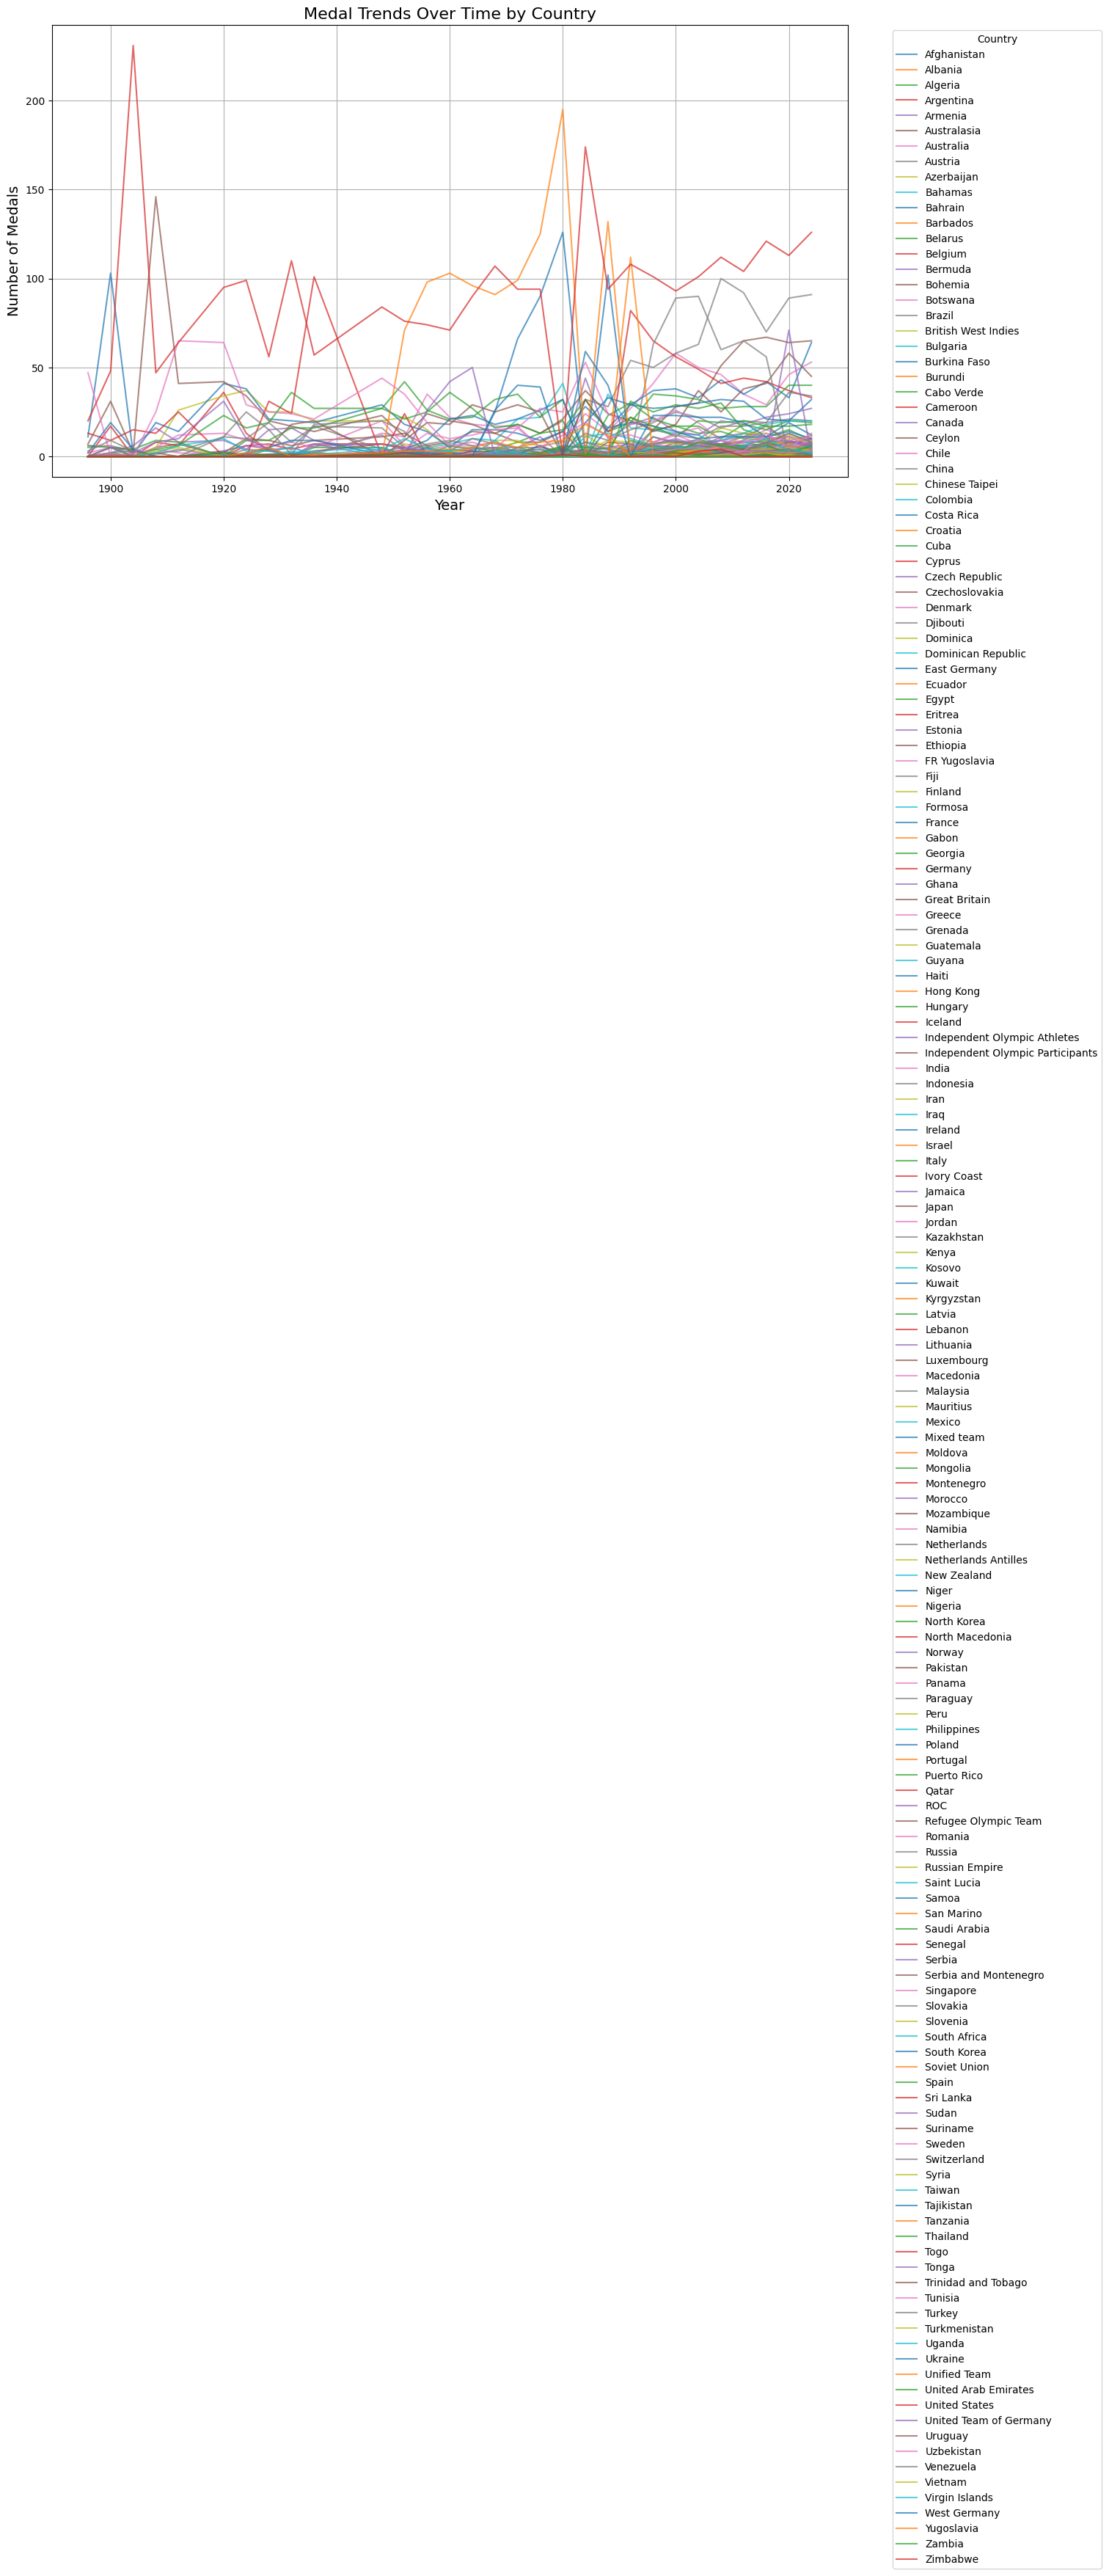

In [5]:

# Plot
plt.figure(figsize=(14, 8))

# Plot a line for each country
for country in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[country], label=country, alpha=0.7)

plt.title("Medal Trends Over Time by Country", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Medals", fontsize=14)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [14]:

# Step 1: Filter data for the last five Olympic years
last_five_years = [2000, 2004, 2008, 2012, 2016]  # Adjust as necessary
pivot_data_last_five_years = pivot_data.loc[last_five_years]

# Step 2: Extract actual data for 2024
actual_2024_data = pivot_data.loc[2024]  # Assuming 2024 data exists in pivot_data

# Step 3: Train linear regression models for each country
regressor = LinearRegression()
predictions_2024 = {}  # Store predictions

# Features (years) and reshape for sklearn
X = np.array(last_five_years).reshape(-1, 1)  # Independent variable (years)

for country in pivot_data.columns:
    # Medal counts for the last five years for the current country
    y = pivot_data_last_five_years[country].values
    
    # Train a linear regression model
    regressor.fit(X, y)
    
    # Predict medal count for 2024
    predictions_2024[country] = regressor.predict([[2024]])[0]

# Step 4: Compare predictions with actual 2024 data
# Convert predictions and actual data to Series for easier alignment
predicted_2024 = pd.Series(predictions_2024)
actual_2024 = actual_2024_data

# Ensure alignment of indices
aligned_actual = actual_2024[actual_2024.index.isin(predicted_2024.index)]
aligned_predicted = predicted_2024[aligned_actual.index]

# Step 5: Calculate Mean Squared Error (MSE)
mse = mean_squared_error(aligned_actual, aligned_predicted)
print(f"Mean Squared Error (MSE) for 2024 predictions: {mse:.2f}")

# Display predictions vs actual data
comparison = pd.DataFrame({
    "Predicted": aligned_predicted,
    "Actual": aligned_actual
})
print(comparison)

Mean Squared Error (MSE) for 2024 predictions: 41.96
                Predicted  Actual
NOC                              
Afghanistan           0.8     0.0
Albania               0.0     2.0
Algeria               0.0     3.0
Argentina             4.0     3.0
Armenia               5.6     4.0
...                   ...     ...
Virgin Islands        0.0     0.0
West Germany          0.0     0.0
Yugoslavia            0.0     0.0
Zambia                0.0     1.0
Zimbabwe              0.2     0.0

[164 rows x 2 columns]


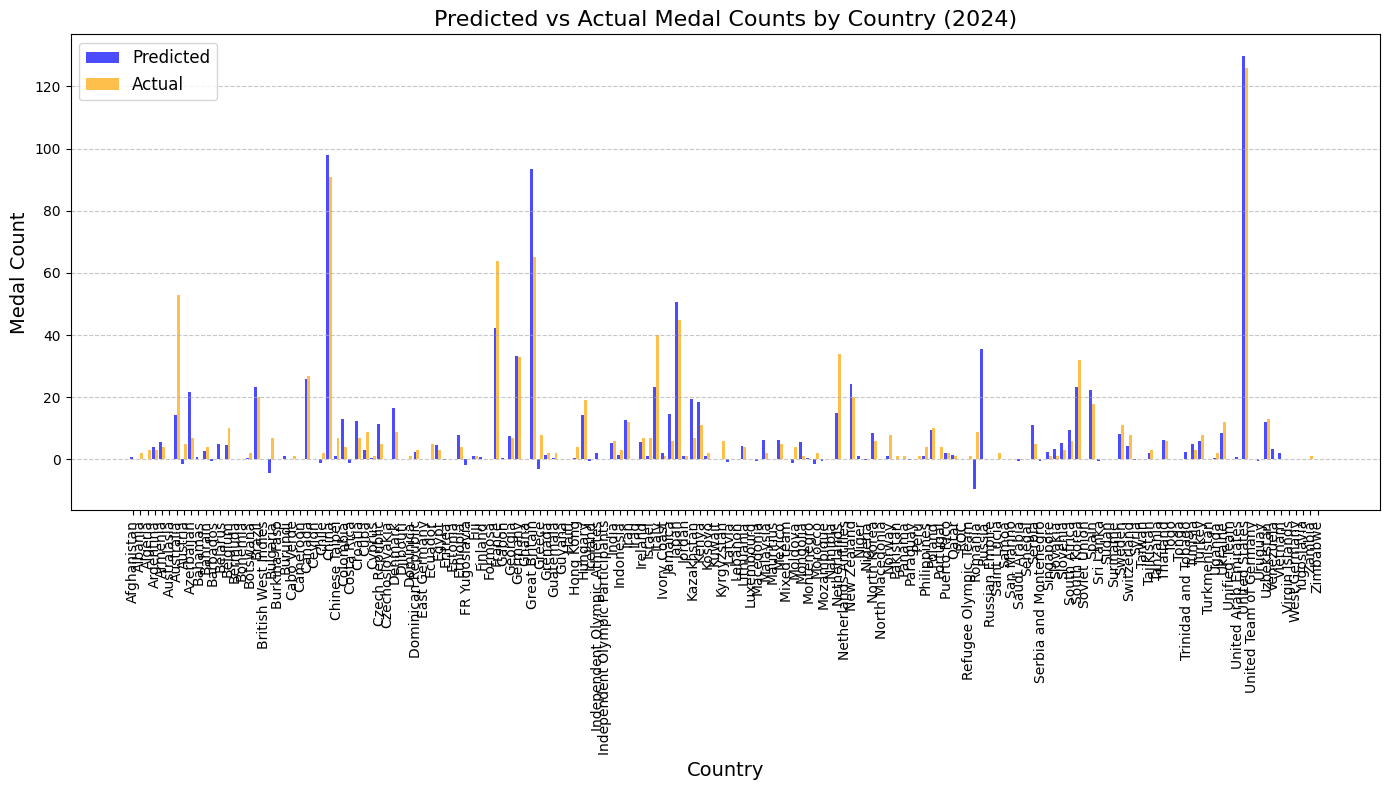

In [16]:
# Step 1: Create a bar plot
x = np.arange(len(aligned_actual))  # Positions for each country on the x-axis
width = 0.4  # Width of the bars

plt.figure(figsize=(14, 8))

# Plot predicted and actual counts
plt.bar(x - width / 2, aligned_predicted, width, label="Predicted", color='blue', alpha=0.7)
plt.bar(x + width / 2, aligned_actual, width, label="Actual", color='orange', alpha=0.7)

# Step 2: Add labels and title
plt.title("Predicted vs Actual Medal Counts by Country (2024)", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Medal Count", fontsize=14)
plt.xticks(x, aligned_actual.index, rotation=90, fontsize=10)  # Country names on x-axis
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Step 3: Adjust layout and display the plot
plt.tight_layout()
plt.show()
